## Reuters

In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras.datasets import reuters
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

In [ ]:
# Load the Reuters dataset
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=10000)

# Convert the data to one-hot encoding
tokenizer = Tokenizer(num_words=10000)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Define the model architecture
model = keras.Sequential()
model.add(layers.Embedding(10000, 128, input_length=10000))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.metrics_names)
# ['loss', 'acc']
batch_size = 32
epochs = 3

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3
253/253 [==============================] - 12s 43ms/step - loss: 2.3811 - accuracy: 0.3543 - val_loss: 2.4357 - val_accuracy: 0.3315
Epoch 2/3
253/253 [==============================] - 11s 43ms/step - loss: 2.3535 - accuracy: 0.3507 - val_loss: 2.4082 - val_accuracy: 0.3315
Epoch 3/3
71/71 [==============================] - 1s 15ms/step - loss: 2.3403 - accuracy: 0.3620
Test loss: 2.3402557373046875
Test accuracy: 0.36197686195373535


## IMDB

In [ ]:
from keras.utils import pad_sequences
from keras.datasets import imdb

# Load the IMDB dataset and keep only the top 5000 most frequent words
word_index = imdb.get_word_index()
top_words = 5000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=top_words)

# Pad sequences to the same length
max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Obtain 3 texts
for i in np.random.randint(0, len(X_train), 3):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(X_train[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in X_train[i] ))

Sample = 3144 | Length = 10000
<PAD> <START> <START> <PAD> <START> <START> <START> <START> <START> <START> <START> <PAD> <START> <START> <PAD> <PAD> <START> <START> <PAD> <PAD> <PAD> <START> <PAD> <START> <START> <START> <PAD> <START> <PAD> <START> <START> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <START> <PAD> <START> <START> <PAD> <START> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <START> <START> <START> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <START> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <START> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <START> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <START> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PA

In [ ]:
# Define the Keras model
model = keras.Sequential()
model.add(layers.Embedding(top_words, 15, input_length=10000))
model.add(layers.Dropout(0.50))
model.add(layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(layers.Dropout(0.50))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.50))
model.add(layers.Dense(46, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Give a summary
model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=15, verbose=True, validation_split=0.20)
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10000, 15)         75000     
                                                                 
 dropout_12 (Dropout)        (None, 10000, 15)         0         
                                                                 
 conv1d_8 (Conv1D)           (None, 10000, 32)         992       
                                                                 
 dropout_13 (Dropout)        (None, 10000, 32)         0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 5000, 32)         0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 160000)            0         
                                                     

## Autoenkoder stosowy / gleboki

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 5s 5ms/step - loss: 0.2158 - val_loss: 0.1402
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1257 - val_loss: 0.1139
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1089 - val_loss: 0.1027
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1008 - val_loss: 0.0969
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0963 - val_loss: 0.0933
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0932 - val_loss: 0.0909
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0906 - val_loss: 0.0890
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0886 - val_loss: 0.0871
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0870 - val_loss: 0.0859
Epoch 10/50
235/235 [==============

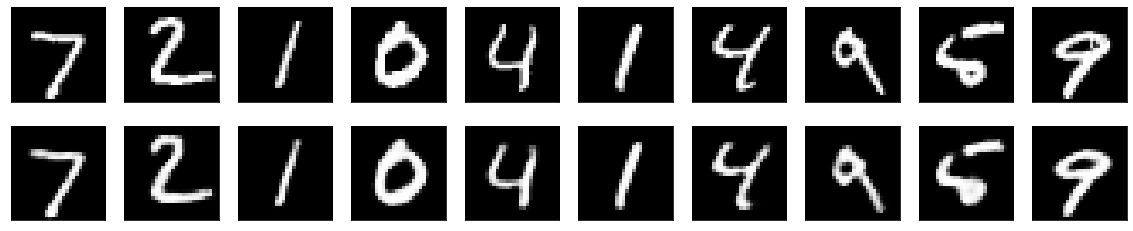

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Wymiary obrazków MNIST
input_dim = 784

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych MNIST
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizujemy dane i przekształcamy na wektor
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Trenujemy model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Dekodowana wersja obrazka
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Autoenkoder odszumiajacy

Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.2449 - val_loss: 0.1818
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1664 - val_loss: 0.1539
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1484 - val_loss: 0.1418
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1393 - val_loss: 0.1348
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1331 - val_loss: 0.1302
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1291 - val_loss: 0.1270
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1257 - val_loss: 0.1242
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1231 - val_loss: 0.1234
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1210 - val_loss: 0.1207
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1192 - val_loss: 0.1195

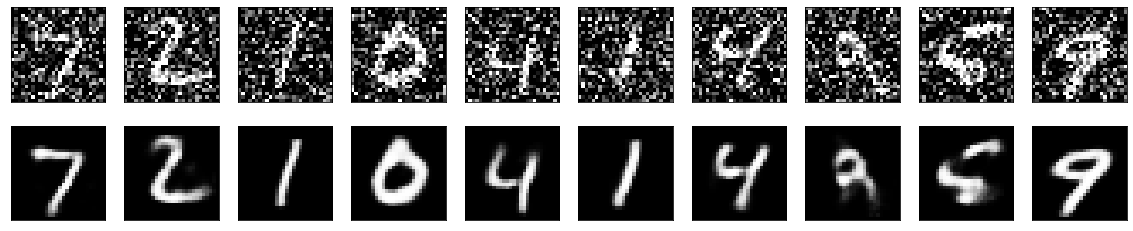

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

# Wymiary obrazków MNIST
input_dim = 784

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizujemy i przekształcamy dane
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Dodajemy szum gaussowski do obrazków
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Przekształcamy dane na wektory
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

# Trenujemy model na danych z szumem
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test_noisy)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Odpowiadający mu obrazek zdekodowany przez model
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Autoenkodery rzadkie (ang. sparse autoencoders)

Epoch 1/50
235/235 [==============================] - 3s 6ms/step - loss: 0.4358 - val_loss: 0.2630
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2632 - val_loss: 0.2629
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2631 - val_loss: 0.2629
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2631 - val_loss: 0.2627
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2631 - val_loss: 0.2627
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2631 - val_loss: 0.2629
Epoch 7/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2630 - val_loss: 0.2629

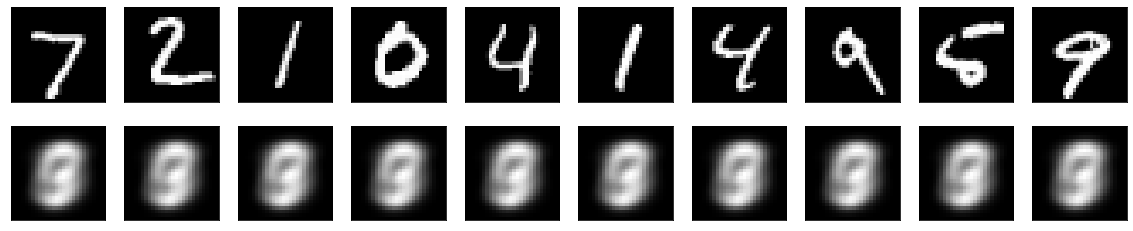

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
import numpy as np

# Wymiary obrazków MNIST
input_dim = 784

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Parametr regularyzacji rzadkości
sparsity_factor = 0.1

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu', activity_regularizer=regularizers.l1(sparsity_factor))(input_img)
encoded = Dense(encoding_dim2, activation='relu', activity_regularizer=regularizers.l1(sparsity_factor))(encoded)
encoded = Dense(encoding_dim3, activation='relu', activity_regularizer=regularizers.l1(sparsity_factor))(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizujemy i przekształcamy dane
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Trenujemy model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Odpowiadający mu obrazek zdekodowany przez model
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Autoenkodery kurczliwe (ang. contractive autoencoders)

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2303 - val_loss: 0.1507
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1343 - val_loss: 0.1202
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1137 - val_loss: 0.1064
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1034 - val_loss: 0.0990
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0974 - val_loss: 0.0945
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0936 - val_loss: 0.0914
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0908 - val_loss: 0.0890
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0887 - val_loss: 0.0872
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0870 - val_loss: 0.0858
Epoch 10/10
313/313 [==============================] - 1s 1ms/step


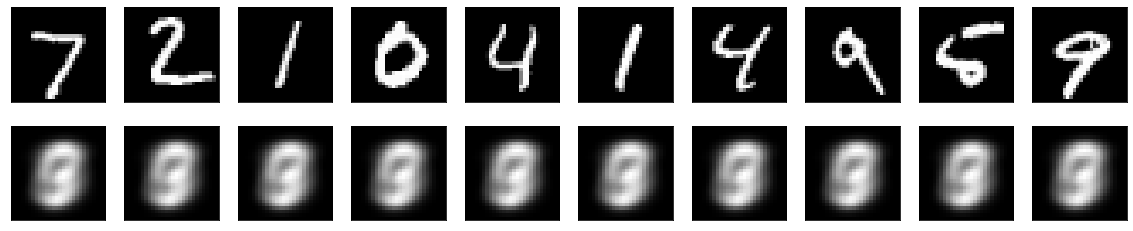

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
import numpy as np

# Load MNIST dataset
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten input data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define contractive autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode test set
encoded_imgs = autoencoder.predict(x_test)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Odpowiadający mu obrazek zdekodowany przez model
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Autoenkodery wariacyjne (ang. variational autoencoders)

Epoch 1/2
469/469 [==============================] - 5s 5ms/step - loss: 0.3046 - val_loss: 0.2654
Epoch 2/2
1/1 [==============================] - 0s 17ms/step


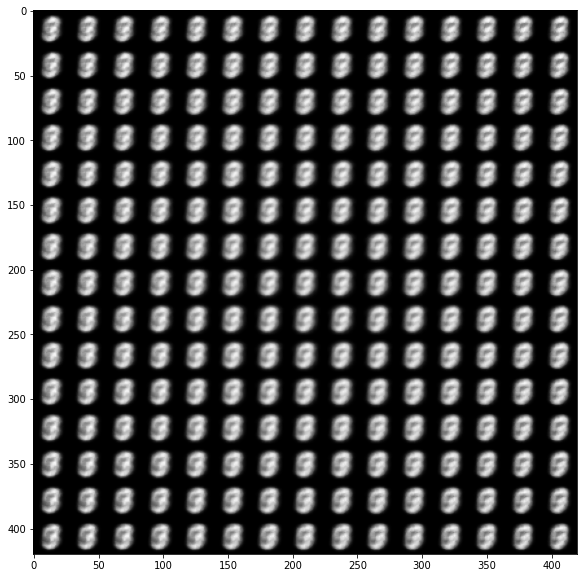

In [ ]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from keras import backend as K
import numpy as np

# Define the dimensions of the latent space
latent_dim = 2

# Define the input shape
input_shape = (784,)

# Define the encoder architecture
input_layer = Input(shape=input_shape)
hidden_layer = Dense(512, activation='relu')(input_layer)
z_mean = Dense(latent_dim)(hidden_layer)
z_log_var = Dense(latent_dim)(hidden_layer)

# Define the sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Use the sampling function to sample from the latent space
z = Lambda(sampling)([z_mean, z_log_var])

# Define the decoder architecture
decoder_input = Input(shape=(latent_dim,))
decoder_hidden = Dense(512, activation='relu')(decoder_input)
decoder_output = Dense(784, activation='sigmoid')(decoder_hidden)

# Define the models
encoder = Model(input_layer, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_input, decoder_output, name='decoder')
vae_output = decoder(encoder(input_layer)[2])
vae = Model(input_layer, vae_output, name='vae')

# Define the loss function
reconstruction_loss = binary_crossentropy(input_layer, vae_output)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)

# Compile the model
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_train = x_train.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))
x_test = x_test.astype('float32') / 255.

# Train the model
vae.fit(x_train, epochs=2, batch_size=128, validation_data=(x_test, None))


import matplotlib.pyplot as plt

def display_vae_results(vae, x_test):
    # Encode the test images
    encoder = vae.get_layer('encoder')
    z_mean, _, _ = encoder.predict(x_test)

    # Generate new images by sampling from the learned distribution
    decoder = vae.get_layer('decoder')
    n = 15  # number of images to generate
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))

    # Sample from the learned distribution
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    # Plot the generated images
    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

# Generate and display new images
display_vae_results(vae, x_test)

# CIFAR 10 (zadanie 2)

Epoch 1/50
196/196 [==============================] - 4s 10ms/step - loss: 0.6394 - val_loss: 0.6128
Epoch 2/50
196/196 [==============================] - 1s 8ms/step - loss: 0.6064 - val_loss: 0.6016
Epoch 3/50
196/196 [==============================] - 1s 7ms/step - loss: 0.5980 - val_loss: 0.5970
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 0.5937 - val_loss: 0.5921
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 0.5903 - val_loss: 0.5898
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 0.5884 - val_loss: 0.5882
Epoch 7/50
196/196 [==============================] - 2s 9ms/step - loss: 0.5872 - val_loss: 0.5870
Epoch 8/50
196/196 [==============================] - 2s 8ms/step - loss: 0.5858 - val_loss: 0.5874
Epoch 9/50
196/196 [==============================] - 1s 7ms/step - loss: 0.5848 - val_loss: 0.5856
Epoch 10/50
196/196 [==============================] - 1s 7ms/step - loss: 0.5841 - val_loss: 0.585

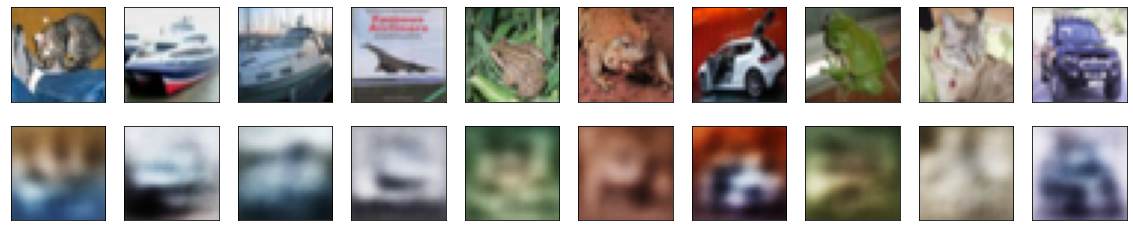

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Wymiary obrazków CIFAR-10
input_dim = 3072

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych CIFAR-10
from keras.datasets import cifar10
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalizujemy dane i przekształcamy na wektor
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Trenujemy model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Dekodowana wersja obrazka
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()